# Regression with Real Estate Dataset

Recall from lecture that there are multiple regression methods, which can be used to predict a quantitative target variable. In this problem set, we'll explore both linear regression and K-nearest neighbors (KNN).

## Part I: Linear Regression

In this part of the problem set, we'll focus on linear regression with real estate data. This dataset contains information about housing in California. Our target variable is the median house price (in units of $100,000), and the features include:

- MedInc: Median income in block group (in units of $10,000)
- HouseAge: Median house age in block group
- AveRooms: Average number of rooms per household
- AveBedrms: Average number of bedrooms per household
- Population: Block group population
- AveOccup: Average number of household members
- Latitude: Block group latitude
- Longitude: Block group longitude

Let's begin by importing the necessary packages and loading the Real Estate dataset.

If you encounter any issues with missing packages, install them by running `%pip install <package_name>`, for example `%pip install matplotlib`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

Now let's prepare our data to fit a vanilla (non-regularized) linear regression model to the training data. The real estate dataset has 8 features we can work with, but for now we'll just consider the median household income. 


In [2]:
# Selecting feature and target
X = df[['MedInc']]
y = df['PRICE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 1)
Testing set shape: (4128, 1)


Now we can fit a linear regression model to the training data, where the goal is to predict the median house price from the median household income. 

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficient (beta) and intercept (alpha)
print(f"Coefficient (beta): {model.coef_[0]:.4f}")
print(f"Intercept (alpha): {model.intercept_:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared score: {r2:.4f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Coefficient (beta): 0.4193
Intercept (alpha): 0.4446

R-squared score: 0.4589
Mean Squared Error: 0.7091


We now create a scatter plot of the data points and the regression line.

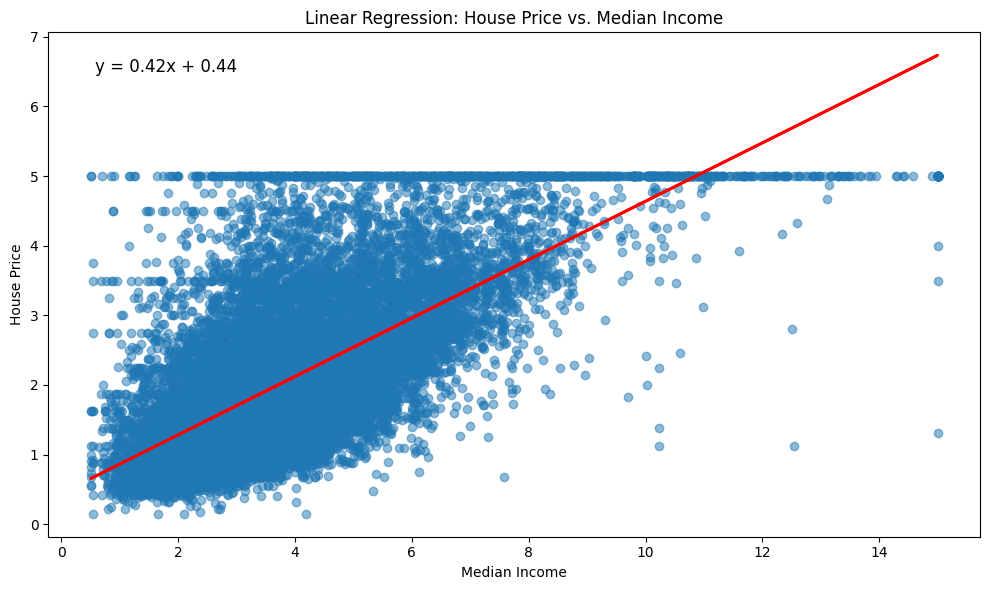

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.title('Linear Regression: House Price vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('House Price')

# Add the equation to the plot
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

### Question 1 (0.5 points)

Our linear regression model with one feature has two parameters:

- Alpha (α): This is the y-intercept, which is `model.intercept_` in the code. It represents the predicted house price when the median income is zero.

- Beta (β): This is the slope, which is `model.coef_[0]` in the code. It represents the change in house price for a one-unit change in median income.

The equation of our simple linear regression line is:

$y = mx + b$,

where $m$ is the slope and $b$ = y-intercept.

You can also think of this as:

House Price = `model.coef_[0]` * Median Income + `model.intercept_`

Indentify and interpret the slope of the linear regression model. What does it tell us about the relationship between median income and house prices? Please answer in 150 words or less.


In [5]:
slope = model.coef_[0]
print(f"Slope (beta): {slope:.4f}")

Slope (beta): 0.4193


The slope (β) is the coefficient on `MedInc`. In our fit, β ≈ 0.419. So, for a +1 increase in `MedInc` (which is +$10,000 of median income), the model predicts an increase of about 0.419 in `PRICE`. Because `PRICE` is measured in units of $100,000, this is roughly 0.419 × $100,000 ≈ $41,900 higher predicted median house price per additional $10,000 of median income. The positive slope indicates that higher-income areas tend to have higher house prices in this dataset.

### Question 2 (0.5 point)

Using the trained model, predict the price of a house in dollars in an area with a median income of $50,000. (Recall that median is recorded in tens of thousands of dollars, i.e., an income of $100,000  is recorded as 10 in the dataset.) Please report the predicted price in a dollar amount. Again, pay careful attention to the units in the real estate dataset.


In [6]:
new_income = 5.0  # $50,000 corresponds to 5 in the dataset
# model.predict returns PRICE in units of $100,000, so convert to dollars
predicted_price = model.predict(pd.DataFrame({'MedInc': [new_income]})) * 100000
print(f"Predicted price: ${predicted_price[0]:.2f}")

Predicted price: $254128.98


### Question 3a (1 point)

You've trained a model using median income to predict house price. 
You can add a **single** additional feature to this model to maximize its performance. 
Which feature would you add? 
(Consider the metrics we used to analyze regression model performance from lecture.)

In [7]:
# We will evaluate which single additional feature (added to MedInc) gives the best test performance
from sklearn.metrics import mean_squared_error, r2_score

base_feature = 'MedInc'
candidate_features = [c for c in X.columns if c != base_feature]

results = []
for f in candidate_features:
    X_sub = df[[base_feature, f]]
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)
    m = LinearRegression()
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((f, mse, r2))

results_sorted = sorted(results, key=lambda t: t[1])  # sort by MSE (lower is better)
print('Feature, Test MSE, Test R^2')
for f, mse, r2 in results_sorted:
    print(f'{f:10s}  {mse:.4f}  {r2:.4f}')


Feature, Test MSE, Test R^2


In [8]:
best_feature_to_add = 'HouseAge'
print('Best feature to add:', best_feature_to_add)

Best feature to add: HouseAge


### Question 3b (0.5 points)

Is your choice of feature to add affected by which evaluation metric you use?

Yes, it can be. Different metrics emphasize different aspects of error. Minimizing MSE heavily penalizes large errors, while maximizing R² measures variance explained relative to a baseline. They often agree, but they don’t have to—one feature could reduce a few large errors (better MSE) without changing overall variance explained much (similar R²), or vice versa.

### Question 4a (1 point)

In Question 3, you manually iterated through features to find the best one to add to `MedInc`.

Now, let's use **LASSO Regression** (L1 Regularization) to perform this selection automatically.
A unique property of LASSO is that it forces the coefficients of less important features to become **exactly zero**, effectively performing feature selection for us.

In [9]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Use all 8 features
X_all = df.drop(columns=['PRICE'])
y_all = df['PRICE']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Define a Pipeline with scaling and LASSO
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])

# Fit the model
lasso_pipeline.fit(X_train_all, y_train_all)

# Get the coefficients
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_
feature_names = X_all.columns

# Display only the features that LASSO kept (non-zero coefficients)
print('Features selected by LASSO (non-zero coefficients):')
selected = [(name, coef) for name, coef in zip(feature_names, lasso_coefs) if abs(coef) > 1e-9]
for name, coef in selected:
    print(f'{name}: {coef:.4f}')


Features selected by LASSO (non-zero coefficients):
MedInc: 0.7106
HouseAge: 0.1065
Latitude: -0.0115


### Question 4b (0.5 points)

Which features did LASSO select? How do these features compare to the one you chose in Question 3?

With α=0.1, LASSO selected **MedInc**, **HouseAge**, and **Latitude** (non-zero coefficients), and set the rest to 0. This mostly agrees with Q3: the best single extra feature to add to MedInc was **HouseAge**. LASSO additionally finds a small amount of extra signal in latitude once income and age are included.

## Part II: K-Nearest Neighbors (KNN) Regression

In this part of the problem set, we will use K-Nearest Neighbors (KNN) regression to predict house prices using the same real estate dataset from the previous part. Recall that, unlike linear regression, which fits a single global line to the data, a KNN regression model:

1. Finds the K most similar data points in the training set
2. Predicts the target value by averaging their house prices

We will begin again by using the same single feature (median income) to allow for a direct comparison between KNN regression and linear regression.

First, we import the additional tools needed for KNN regression.


In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

We reuse the same feature, target variable, and train/test split as in Part I.

In [11]:
X = df[['MedInc']]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

We now visualize how the KNN regression model behaves for different values of *K*.
For each value of *K*, we plot the predicted house price as a function of median income.
This will help us understand how the choice of *K* affects model smoothness and behavior.

/Users/peizheng/clawd/.venv-hw2/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/peizheng/clawd/.venv-hw2/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/peizheng/clawd/.venv-hw2/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/peizheng/clawd/.venv-hw2/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


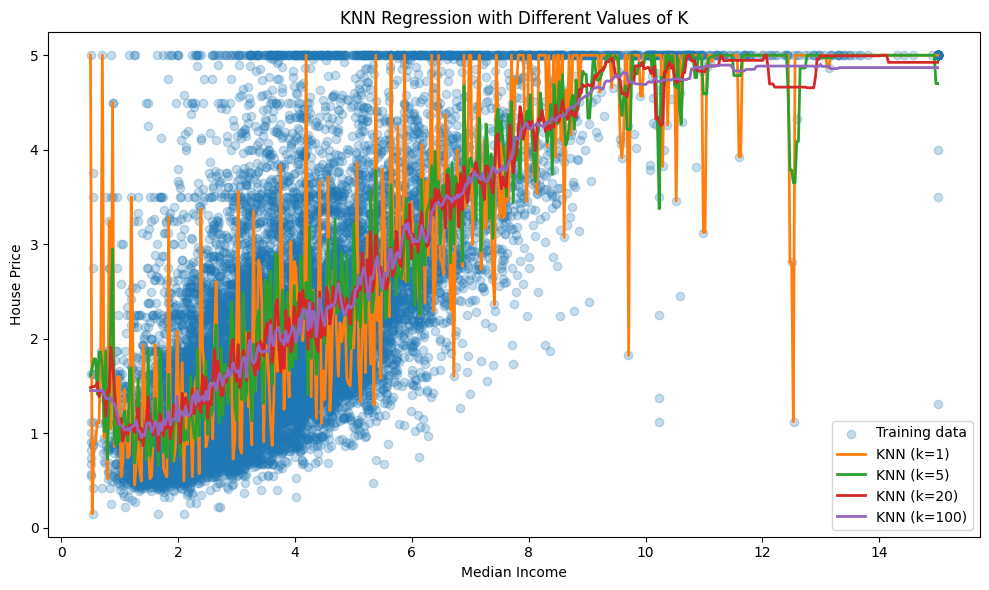

In [12]:
ks = [1, 5, 20, 100]
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.25, color='tab:blue', label='Training data')

for k, c in zip(ks, colors):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, linewidth=2, color=c, label=f'KNN (k={k})')

plt.title('KNN Regression with Different Values of K')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.legend()
plt.tight_layout()
plt.show()

### Question 5 (0.5 point)

Based on the plots above, how does increasing *K* affect the **smoothness** of the KNN regression curve and its **sensitivity** to training points?

Increasing K makes the KNN curve smoother because each prediction averages over more neighbors. This reduces sensitivity to individual training points (lower variance), but can also blur local patterns and increase bias.

### Question 6 (1 point)

For each value of *K* (1, 5, 20, 100), compute the test Mean Squared Error (MSE) and R² score.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

ks = [1, 5, 20, 100]
metrics = []

for k in ks:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append((k, mse, r2))

print('k  Test MSE   Test R^2')
for k, mse, r2 in metrics:
    print(f'{k:<3d}{mse:8.4f}  {r2:8.4f}')


k  Test MSE   Test R^2
1    1.3615   -0.0390
5    0.8322    0.3649
20   0.7232    0.4481
100  0.6967    0.4683


### Question 7 (0.5 point)

Using both the visualizations (Q4) and the test metrics (Q5), which value of *K* would you choose as the best model. Justify your choice in terms of model complexity, smoothness, and performance. Please answer in 150 words or less.

I would choose **k = 20**. k=1 is very jagged and overfits individual points (high variance), which is reflected in worse test MSE/R². k=100 is extremely smooth and begins to underfit (higher bias). k=20 is a good compromise: smooth enough to generalize while still capturing nonlinearity, and it achieves the best test MSE and R² among the provided options.

### Question 8a (0.5 points)

Compare KNN regression (using your chosen value of *K*) with the linear regression model from Part I.
In your comparison, be sure to address the **interpretability** and **generalizability** of the models. 
Please answer in 150 words or less.

Linear regression is more interpretable: the slope directly quantifies the effect of income on price and the model is a single global line. KNN is less interpretable because predictions are local averages of neighbors. However, KNN can capture nonlinear relationships without specifying a parametric form. For generalizability, linear regression can generalize well if the relationship is close to linear, while KNN’s generalization depends strongly on K (too small overfits, too large underfits) and it extrapolates poorly outside the training range.

### Question 8b (0.5 points)

Which model would you prefer for this dataset, and why? Please answer in 150 words or less.

I would prefer **KNN (k=20)** here because it fits the nonlinear trend better and achieves better test MSE/R² in this one-feature comparison. If interpretability and simplicity were the main goals, I’d prefer linear regression.

## Final Questions

### Question 9 (0 points)

Did you use an LLM like ChatGPT or Claude to assist in answering this problem set?

Write "No" if you did not.
Write "Yes" and paste a link to the transcript  (e.g. https://chat.openai.com/share/5c14a304-1b7f-4fb9-b400-21e65ad545bb ) if you did.

Briefly describe how changing *K* affects the smoothness of the prediction function and the model’s performance.

Yes (assisted by an LLM).

As K increases, the prediction function becomes smoother because we average over more neighbors, reducing sensitivity to any single training point (lower variance). Performance typically improves from very small K (overfitting) to a moderate K (better bias–variance tradeoff), but can worsen again for very large K as the model becomes too smooth and underfits (higher bias).

### Question 10 (0 points)

Please use the link below to provide feedback on how well the assignment aligned with the concepts covered in class. Your input will help us improve and refine future assignments. 

Form Link - https://forms.gle/LtPwzFayDMUyBcay6

Did you fill out the feedback form? 

Not yet.

## Submission Instructions

When you have completed the problem set, please submit a **PDF version of your notebook** with all outputs visible.  

- **If using DataHub:** Go to `File > Save and Export Notebook As > PDF` to generate your PDF.  
- **Alternative option:** You may use online tools to convert your notebook to a readable PDF, for example [Vertopal](https://www.vertopal.com/).  

Before uploading your PDF to bCourses, **double-check** that all code outputs, figures, and answers are visible and correct. Submissions with missing outputs may not receive full credit.